In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib
from sklearn.decomposition import TruncatedSVD
print("success")

success


In [3]:
folder_path_train ="/content/drive/MyDrive/Data/train.jsonl"
folder_path_dev ="/content/drive/MyDrive/Data/dev.jsonl"
df_train = pd.read_json(folder_path_train,lines=True)
df_dev=pd.read_json(folder_path_dev,lines=True)

print(df_train.tail())

         id            img  label  \
8495  10423  img/10423.png      1   
8496  98203  img/98203.png      1   
8497  36947  img/36947.png      1   
8498  16492  img/16492.png      1   
8499  15937  img/15937.png      1   

                                                   text  
8495                  nobody wants to hang auschwitz me  
8496  when god grants you a child after 20 years of ...  
8497  gays on social media: equality! body positivit...  
8498  having a bad day? you could be a siamese twin ...  
8499  i hate muslims too they take their religion to...  


Distribution of training dataset
 label
0    5450
1    3050
Name: count, dtype: int64 

Distribution of validation dataset
 label
1    250
0    250
Name: count, dtype: int64


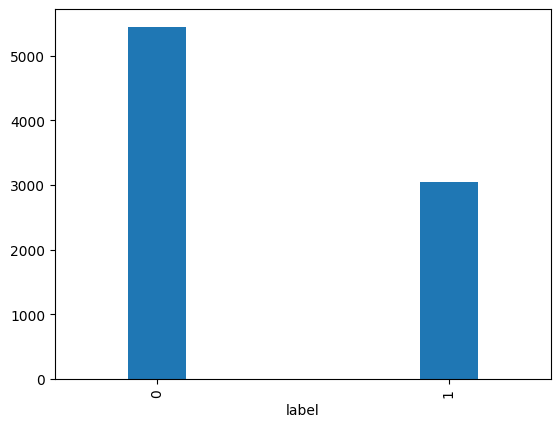

In [4]:
# distribution of movies based on certificate
df_train['label'].value_counts().plot.bar(width=0.2)

print('Distribution of training dataset\n',df_train.label.value_counts(),"\n")
print("Distribution of validation dataset\n",df_dev.label.value_counts())


In [5]:
print(df_train.isna().sum())

print("\n\n",df_dev.isna().sum())

id       0
img      0
label    0
text     0
dtype: int64


 id       0
img      0
label    0
text     0
dtype: int64


In [6]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [7]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [8]:
import gensim.downloader as api
wv=api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [12]:
from google.colab import drive
drive.mount('/content/drive')

# Adjust the path as needed
wv.save('/content/drive/MyDrive/glove_twitter_25.kv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from gensim.models import KeyedVectors
wv=KeyedVectors.load('/content/drive/MyDrive/glove_twitter_25.kv')

w=wv["good"]
print(w)
print("\n\nlength of word vector",len(w))

print("\n\n type of word vector model ",type(wv))
print("\n\n word vector type",type(w))

[-0.54403   0.60274  -0.14543  -0.023398 -0.13771   0.60137   2.192
  0.20804  -0.51536  -0.23101  -0.80387   0.56901  -5.0234    0.26507
  0.47891  -0.59854   0.56132  -1.0905   -0.52587   0.12506  -0.22624
  0.24529  -0.45767   0.92619   0.022125]


length of word vector 25


 type of word vector model  <class 'gensim.models.keyedvectors.KeyedVectors'>


 word vector type <class 'numpy.ndarray'>


In [14]:
data=df_train
data.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [15]:
import spacy.cli
#spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_sm")

In [16]:
def preprocess(text):
  doc=nlp(text)
  filtered_token=[]

  for token in doc:

    if token.is_punct or token.is_space or token.is_bracket:
      continue
    else:
      token=token.lemma_

      filtered_token.append(token)
  return filtered_token

In [17]:
tokens=preprocess("My best friend Anu, (who is three months older than me) is coming to my house tonight!!!.")
tokens

['my',
 'good',
 'friend',
 'Anu',
 'who',
 'be',
 'three',
 'month',
 'old',
 'than',
 'I',
 'be',
 'come',
 'to',
 'my',
 'house',
 'tonight']

In [18]:
data['processed_text']=data['text'].apply(lambda x: preprocess(x))

data

,id,img,label,text,processed_text
0,42953,img/42953.png,0,its their character not their color that matters,"[its, their, character, not, their, color, tha..."
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[do, not, be, afraid, to, love, again, everyon..."
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, on, your, pet]"
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[I, love, everything, and, everybody, except, ..."
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, eve..."
...,...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me,"[nobody, want, to, hang, auschwitz, I]"
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...,"[when, god, grant, you, a, child, after, 20, y..."
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...,"[gay, on, social, medium, equality, body, posi..."
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...,"[have, a, bad, day, you, could, be, a, siamese..."


In [19]:
import numpy as np

def gensim_vector(token):
  vec_size=wv.vector_size
  wv_final=np.zeros(vec_size) # take a vector consisting '0s' having size of wv

  count=1
  for t in token:
    if t in wv:
      count += 1
      wv_final += wv[t] # vectorize word and add to previous value

  return wv_final/count # take the average

In [20]:
text_vector = data["processed_text"].apply(gensim_vector)
data["text_vector"]=text_vector
#data["text_vector"]=data["processed_text"].apply(gensim_vector)
data.head()

,id,img,label,text,processed_text,text_vector
0,42953,img/42953.png,0,its their character not their color that matters,"[its, their, character, not, their, color, tha...","[0.19409333335028756, 0.004764437675476074, -0..."
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...,"[do, not, be, afraid, to, love, again, everyon...","[0.02886528308902468, 0.37722207246614353, 0.1..."
2,13894,img/13894.png,0,putting bows on your pet,"[put, bow, on, your, pet]","[-0.31102167069911957, 0.08844533764446776, -0..."
3,37408,img/37408.png,0,i love everything and everybody! except for sq...,"[I, love, everything, and, everybody, except, ...","[-0.445876414142549, 0.2214261084794998, 0.183..."
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h...","[everybody, love, chocolate, chip, cookie, eve...","[-0.17712125182151794, 0.18230263516306877, 0...."


In [21]:
len(data.text_vector.iloc[0])

25

In [22]:
data.to_csv("text_vec_300.csv",index=False)

In [23]:
# class label 1
val1=data[data.label==1].text_vector
val1=val1.reset_index().drop(['index'],axis=1)


l=len(val1.text_vector.iloc[0])
val1_new=val1.text_vector.iloc[0].reshape(1,l)
for i in range(1,len(val1)):
  b=val1.text_vector.iloc[i].reshape(1,l)
  val1_new=np.append(val1_new,b,axis=0)
print(val1_new.shape) # get a numpy array of dim nx300, n=(samlples with label 1)

# class label 0
val2=data[data.label==0].text_vector
val2=val2.reset_index().drop(['index'],axis=1)

val2_new=val2.text_vector.iloc[0].reshape(1,l)
for i in range(1,len(val2)):
  b=val2.text_vector.iloc[i].reshape(1,l)
  val2_new=np.append(val2_new,b,axis=0)
print(val2_new.shape)# get a numpy array of dim mx300,m=(samlples with label 0)

(3050, 25)
(5450, 25)


Text(0.5, 0, 'Feature dimension')

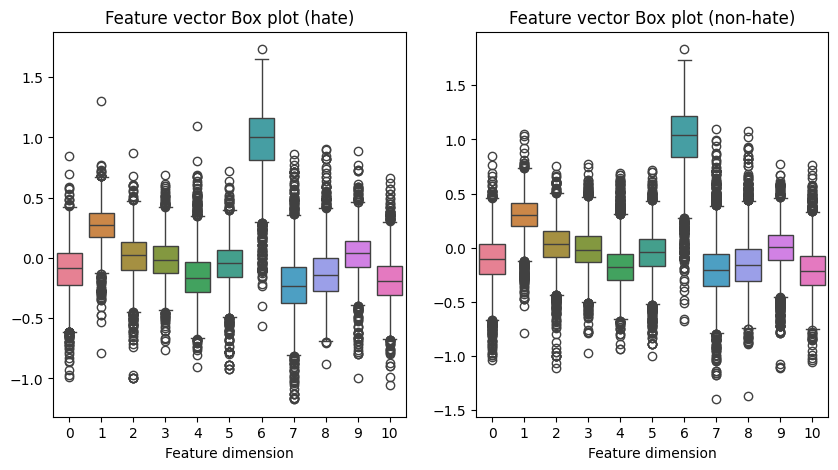

In [24]:
a=val1_new[:,0:11]
b=val2_new[:,0:11]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=a)
plt.title("Feature vector Box plot (hate)")
plt.xlabel('Feature dimension')

plt.subplot(1,2,2)
sns.boxplot(data=b)
plt.title("Feature vector Box plot (non-hate)")
plt.xlabel('Feature dimension')

In [25]:
def plot_embedding(X, y):
    truncated_SVD = TruncatedSVD(n_components = 2)
    truncated_SVD.fit(X)
    scores = truncated_SVD.transform(X)
    color_mapper = {label:idx for idx, label in enumerate(set(y))}
    color_column = [color_mapper[label] for label in y]
    colors = ['black', 'red']

    plt.scatter(scores[:, 0], scores[:, 1], s = 6, alpha = 0.8, c = y, cmap = matplotlib.colors.ListedColormap(colors))
    red_patch = mpatches.Patch(color = 'black', label = 'non hate')
    blue_patch = mpatches.Patch(color = 'red', label = 'hate')

    plt.legend(handles = [red_patch, blue_patch], prop = {"size": 12})

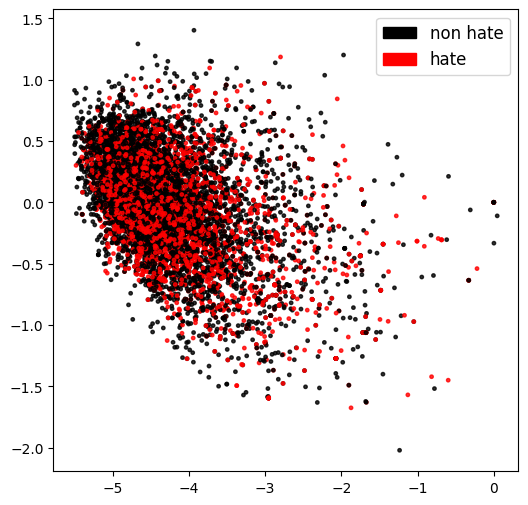

In [26]:
x= np.stack(text_vector)
y=data.label

fig = plt.figure(figsize = (6, 6))
plot_embedding(x,y)
plt.show()

In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

# Load ResNet model without the final classification layer
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_image_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = resnet_model.predict(img_data)
    return features.flatten()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [28]:
# Early Fusion: Concatenate text and image features
def early_fusion(text_vector, image_features):
    return np.concatenate((text_vector, image_features), axis=1)


In [29]:
import os

# Assuming images are stored in '/content/drive/MyDrive/Data/img' and filenames match IDs in the DataFrame
image_dir = '/content/drive/MyDrive/Data/img'

# Generate paths based on an existing 'id' column or other identifier
def get_image_path(row):
    # Example: adjust '.jpg' or use correct extension
    image_path = os.path.join(image_dir, f"{row['id']}.jpg")
    return image_path if os.path.exists(image_path) else None

# Apply this function to create the image_paths column
data['image_paths'] = data.apply(get_image_path, axis=1)

# Check if paths were added
print(data[['id', 'image_paths']].head())


      id image_paths
0  42953        None
1  23058        None
2  13894        None
3  37408        None
4  82403        None


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Train classifiers for text and image separately
text_classifier = LogisticRegression()
image_classifier = LogisticRegression()

# Train both classifiers (e.g., using cross-validation)

# Late Fusion: Combine predictions
def late_fusion(text_predictions, image_predictions, weights=(0.5, 0.5)):
    return (weights[0] * text_predictions + weights[1] * image_predictions) > 0.5


In [31]:
from sklearn.decomposition import PCA

# Sketch Fusion: Use PCA to combine text and image features
def sketch_fusion(text_vector, image_features, n_components=50):
    combined_features = np.concatenate((text_vector, image_features), axis=1)
    pca = PCA(n_components=n_components)
    return pca.fit_transform(combined_features)


In [32]:
!apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (24.2 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [33]:
import pytesseract
from PIL import Image

def extract_text_from_image(image_path):
    img = Image.open(image_path)
    extracted_text = pytesseract.image_to_string(img)
    return extracted_text.strip()


In [34]:
# Drop rows with missing image paths
data = data.dropna(subset=['image_paths']).reset_index(drop=True)


In [35]:
import pytesseract
from PIL import Image

def extract_text_from_image(image_path):
    img = Image.open(image_path)
    extracted_text = pytesseract.image_to_string(img)
    return extracted_text.strip()

data['ocr_text'] = data['image_paths'].apply(extract_text_from_image)
data['combined_text'] = data['text'] + " " + data['ocr_text']


In [36]:
print(data[['text', 'ocr_text', 'combined_text']].head())


Empty DataFrame
Columns: [text, ocr_text, combined_text]
Index: []


In [37]:
# Check how many valid image paths there are
print(data['image_paths'].isna().sum())  # Should print the number of missing paths
print(data['image_paths'].head())        # Check the first few paths


0
Series([], Name: image_paths, dtype: object)


In [38]:
import os

image_dir = '/content/drive/MyDrive/Data/img'
print(os.listdir(image_dir))  # List files in the image directory


['89743.png', '89745.png', '89750.png', '89754.png', '89756.png', '89761.png', '89762.png', '89764.png', '90125.png', '90126.png', '90127.png', '90128.png', '90136.png', '90138.png', '90143.png', '90145.png', '90146.png', '90148.png', '90162.png', '90165.png', '90175.png', '90178.png', '90183.png', '90186.png', '90214.png', '90236.png', '90243.png', '90247.png', '90251.png', '90256.png', '90257.png', '90263.png', '90267.png', '90274.png', '90278.png', '90285.png', '90286.png', '90315.png', '90318.png', '90321.png', '90342.png', '90345.png', '90351.png', '90365.png', '90378.png', '90382.png', '90386.png', '90413.png', '90417.png', '90427.png', '90461.png', '90463.png', '90468.png', '90471.png', '90481.png', '90483.png', '90513.png', '90516.png', '90531.png', '90534.png', '90538.png', '90541.png', '90564.png', '90568.png', '90572.png', '90573.png', '90574.png', '90576.png', '90582.png', '90583.png', '90586.png', '90587.png', '90612.png', '90614.png', '90618.png', '90625.png', '90632.png'

In [39]:
def get_image_path(row):
    # Use '.png' instead of '.jpg'
    image_path = os.path.join(image_dir, f"{row['id']}.png")
    if os.path.exists(image_path):
        return image_path
    else:
        return None  # If the image doesn't exist, return None

# Apply the function to generate the image paths
data['image_paths'] = data.apply(get_image_path, axis=1)

# Check the first few generated paths
print(data[['id', 'image_paths']].head())


Empty DataFrame
Columns: [id, image_paths]
Index: []


In [40]:
# Check the first few rows of the 'id' column
print(data['id'].head())

# Check if there are any missing or NaN values in 'id'
print(data['id'].isna().sum())


Series([], Name: id, dtype: int64)
0


In [41]:
# Check all column names to verify the exact name of the ID column
print(data.columns)



Index(['id', 'img', 'label', 'text', 'processed_text', 'text_vector',
       'image_paths', 'ocr_text', 'combined_text'],
      dtype='object')


In [42]:
# Check the first few rows of the 'img' column
print(data['img'].head())

# Check if there are any missing or NaN values in the 'img' column
print(data['img'].isna().sum())  # This should ideally be 0


Series([], Name: img, dtype: object)
0


In [43]:
import os

# List files in the image directory to check if they match the filenames in the 'img' column
image_dir = '/content/drive/MyDrive/Data/img'
print(os.listdir(image_dir))  # Should show files like '89743.png', '89744.png', etc.


['89743.png', '89745.png', '89750.png', '89754.png', '89756.png', '89761.png', '89762.png', '89764.png', '90125.png', '90126.png', '90127.png', '90128.png', '90136.png', '90138.png', '90143.png', '90145.png', '90146.png', '90148.png', '90162.png', '90165.png', '90175.png', '90178.png', '90183.png', '90186.png', '90214.png', '90236.png', '90243.png', '90247.png', '90251.png', '90256.png', '90257.png', '90263.png', '90267.png', '90274.png', '90278.png', '90285.png', '90286.png', '90315.png', '90318.png', '90321.png', '90342.png', '90345.png', '90351.png', '90365.png', '90378.png', '90382.png', '90386.png', '90413.png', '90417.png', '90427.png', '90461.png', '90463.png', '90468.png', '90471.png', '90481.png', '90483.png', '90513.png', '90516.png', '90531.png', '90534.png', '90538.png', '90541.png', '90564.png', '90568.png', '90572.png', '90573.png', '90574.png', '90576.png', '90582.png', '90583.png', '90586.png', '90587.png', '90612.png', '90614.png', '90618.png', '90625.png', '90632.png'

In [44]:
# Print the result of applying get_image_path to the first few rows
result = data.apply(get_image_path, axis=1)

# Check the result to see if it looks correct
print(result.head())


Series([], dtype: float64)


In [45]:
print(data.shape)  # Check the number of rows and columns
print(data.isna().sum())  # Check if there are any NaN values in the dataframe


(0, 9)
id                0
img               0
label             0
text              0
processed_text    0
text_vector       0
image_paths       0
ocr_text          0
combined_text     0
dtype: int64


In [46]:
# Check the shape of the DataFrame right after loading
df_train = pd.read_json(folder_path_train, lines=True)
df_dev = pd.read_json(folder_path_dev, lines=True)

# Print the shape and the first few rows of the datasets
print("Train dataset shape:", df_train.shape)
print("Dev dataset shape:", df_dev.shape)
print(df_train.head())  # Check the first few rows to ensure data is loaded


Train dataset shape: (8500, 4)
Dev dataset shape: (500, 4)
      id            img  label  \
0  42953  img/42953.png      0   
1  23058  img/23058.png      0   
2  13894  img/13894.png      0   
3  37408  img/37408.png      0   
4  82403  img/82403.png      0   

                                                text  
0   its their character not their color that matters  
1  don't be afraid to love again everyone is not ...  
2                           putting bows on your pet  
3  i love everything and everybody! except for sq...  
4  everybody loves chocolate chip cookies, even h...  


In [47]:
# Define the base path where your images are stored
base_path = "/content/drive/MyDrive/Data/"

# Update the function to handle empty or malformed rows
def get_image_path(row):
    if pd.notna(row['img']) and row['img'] != "":
        return base_path + row['img']
    else:
        # Handle missing or empty image paths
        return None  # or some default value like '/path/to/default/image.png'

# Apply the function to generate full image paths
data['image_paths'] = data.apply(get_image_path, axis=1)

# Check the first few rows to verify that image paths are correctly added
print(data[['id', 'img', 'image_paths']].head())


Empty DataFrame
Columns: [id, img, image_paths]
Index: []


In [48]:
# Check the first few values of the 'img' column to ensure it contains data
print(data['img'].head())


Series([], Name: img, dtype: object)


In [49]:
# Filter and check rows where 'img' column is not empty or NaN
print(data[data['img'].notna() & (data['img'] != "")].head())


Empty DataFrame
Columns: [id, img, label, text, processed_text, text_vector, image_paths, ocr_text, combined_text]
Index: []


In [50]:
# Check if there are missing or malformed data
print(data['img'].isna().sum())  # Number of NaN values
print((data['img'] == "").sum())  # Number of empty strings


0
0


In [51]:
# List all columns in the DataFrame
print(data.columns)


Index(['id', 'img', 'label', 'text', 'processed_text', 'text_vector',
       'image_paths', 'ocr_text', 'combined_text'],
      dtype='object')


In [52]:
# Print the first few rows of the dataset to inspect
print(data.head())


Empty DataFrame
Columns: [id, img, label, text, processed_text, text_vector, image_paths, ocr_text, combined_text]
Index: []


In [53]:
# Update the path generation logic if img contains paths like img/filename.png
def get_image_path(row):
    if pd.notna(row['img']) and row['img'] != "":
        return base_path + row['img']
    else:
        # Handle missing or empty image paths
        return None

# Apply the function to generate full image paths
data['image_paths'] = data.apply(get_image_path, axis=1)

# Check the result
print(data[['id', 'img', 'image_paths']].head())


Empty DataFrame
Columns: [id, img, image_paths]
Index: []


In [54]:
# Reload the data (if using JSON, CSV, etc.)
data = pd.read_json("/content/drive/MyDrive/Data/train.jsonl", lines=True)  # or pd.read_csv()

# Check the column names and inspect data
print(data.columns)
print(data.head())


Index(['id', 'img', 'label', 'text'], dtype='object')
      id            img  label  \
0  42953  img/42953.png      0   
1  23058  img/23058.png      0   
2  13894  img/13894.png      0   
3  37408  img/37408.png      0   
4  82403  img/82403.png      0   

                                                text  
0   its their character not their color that matters  
1  don't be afraid to love again everyone is not ...  
2                           putting bows on your pet  
3  i love everything and everybody! except for sq...  
4  everybody loves chocolate chip cookies, even h...  


In [55]:
# Reload the data (if using JSON, CSV, etc.)
data = pd.read_json("/content/drive/MyDrive/Data/dev.jsonl", lines=True)  # or pd.read_csv()

# Check the column names and inspect data
print(data.columns)
print(data.head())


Index(['id', 'img', 'label', 'text'], dtype='object')
      id            img  label  \
0   8291  img/08291.png      1   
1  46971  img/46971.png      1   
2   3745  img/03745.png      1   
3  83745  img/83745.png      1   
4  80243  img/80243.png      1   

                                                text  
0              white people is this a shooting range  
1                              bravery at its finest  
2  your order comes to $37.50 and your white priv...  
3  it is time.. to send these parasites back to t...  
4                             mississippi wind chime  


In [56]:
# Set the base directory where images are stored (adjust this based on your setup)
base_path = "/content/drive/MyDrive/Data/images/"  # Change this path if your images are in a different directory

# Function to generate full image paths
def get_image_path(row):
    if pd.notna(row['img']) and row['img'] != "":
        return base_path + row['img']
    else:
        return None  # Handle missing or empty image paths

# Apply the function to generate full image paths
data['image_paths'] = data.apply(get_image_path, axis=1)

# Check the first few rows to verify that image paths are correctly added
print(data[['id', 'img', 'image_paths']].head())


      id            img                                       image_paths
0   8291  img/08291.png  /content/drive/MyDrive/Data/images/img/08291.png
1  46971  img/46971.png  /content/drive/MyDrive/Data/images/img/46971.png
2   3745  img/03745.png  /content/drive/MyDrive/Data/images/img/03745.png
3  83745  img/83745.png  /content/drive/MyDrive/Data/images/img/83745.png
4  80243  img/80243.png  /content/drive/MyDrive/Data/images/img/80243.png


In [57]:
# Fix the image path generation by prepending the correct folder path
image_folder_path = "/content/drive/MyDrive/Data/images/"

# Update the image_paths column
data['image_paths'] = data['img'].apply(lambda x: os.path.join(image_folder_path, x))

# Check the first few rows again
print(data[['id', 'img', 'image_paths']].head())


      id            img                                       image_paths
0   8291  img/08291.png  /content/drive/MyDrive/Data/images/img/08291.png
1  46971  img/46971.png  /content/drive/MyDrive/Data/images/img/46971.png
2   3745  img/03745.png  /content/drive/MyDrive/Data/images/img/03745.png
3  83745  img/83745.png  /content/drive/MyDrive/Data/images/img/83745.png
4  80243  img/80243.png  /content/drive/MyDrive/Data/images/img/80243.png


In [58]:
# Correct the image path construction
image_folder_path = "/content/drive/MyDrive/Data/img/"  # Path to your img folder

# Update the image_paths column
data['image_paths'] = data['img'].apply(lambda x: os.path.join(image_folder_path, x.split('/')[-1]))

# Check the first few rows again to verify the paths
print(data[['id', 'img', 'image_paths']].head())


      id            img                                image_paths
0   8291  img/08291.png  /content/drive/MyDrive/Data/img/08291.png
1  46971  img/46971.png  /content/drive/MyDrive/Data/img/46971.png
2   3745  img/03745.png  /content/drive/MyDrive/Data/img/03745.png
3  83745  img/83745.png  /content/drive/MyDrive/Data/img/83745.png
4  80243  img/80243.png  /content/drive/MyDrive/Data/img/80243.png


In [59]:
# Check if images exist at the specified paths
missing_images = []
for img_path in data['image_paths']:
    if not os.path.exists(img_path):
        missing_images.append(img_path)

# Print missing images (if any)
if missing_images:
    print(f"Missing images: {missing_images}")
else:
    print("All images are found.")


All images are found.


In [60]:
# Select a random subset of 5 images for testing
test_data = data.sample(n=5, random_state=42)  # Randomly sample 5 rows

# Apply OCR to the selected subset
test_data['ocr_text'] = test_data['image_paths'].apply(extract_text_from_image)

# Now apply fusion techniques on these 5 images (you can replace this with your actual fusion code)
# Example: test fusion techniques on `test_data` here

print(test_data[['id', 'img', 'ocr_text']])


        id            img                            ocr_text
361  46085  img/46085.png  a <\n\ncoverit up with black sheet
73   84510  img/84510.png          TERM anne NCE)\n\nToe\ni .
374  35840  img/35840.png           AnUitheySentmelarsandwien
155  76921  img/76921.png          she probably;\n\n. 9\nMAST
104  43810  img/43810.png               howto cook\nCa MOLLE)


In [64]:
print(data.columns)


Index(['id', 'img', 'label', 'text', 'image_paths'], dtype='object')


In [65]:
# Apply OCR on the selected subset and add `ocr_text` as a new column in `test_data`
test_data['ocr_text'] = test_data['image_paths'].apply(lambda path: extract_text_from_image(path))

# Verify that the OCR text is added
print(test_data[['id', 'img', 'text', 'ocr_text']])


        id            img                                               text  \
361  46085  img/46085.png  city workers repair statue cover it up with bl...   
73   84510  img/84510.png  bartender: how about a nice 12 yr old? him: bo...   
374  35840  img/35840.png  i ordered a dishwasher and they sent me a sand...   
155  76921  img/76921.png                she probably asked a wrong question   
104  43810  img/43810.png  how to cook turkey in usa how to cook turkey i...   

                               ocr_text  
361  a <\n\ncoverit up with black sheet  
73           TERM anne NCE)\n\nToe\ni .  
374           AnUitheySentmelarsandwien  
155          she probably;\n\n. 9\nMAST  
104               howto cook\nCa MOLLE)  


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize vectorizer for both text and OCR text
vectorizer = TfidfVectorizer(max_features=100)

# Vectorize text and OCR text
text_vectors = vectorizer.fit_transform(test_data['text']).toarray()
ocr_vectors = vectorizer.transform(test_data['ocr_text']).toarray()  # Transform using the same vectorizer

# Combine for Early Fusion
early_fusion_vectors = np.hstack([text_vectors, ocr_vectors])

# Initialize classifiers
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Early Fusion Model
lr_model.fit(early_fusion_vectors, test_data['label'])
early_fusion_preds = lr_model.predict(early_fusion_vectors)
print(f"Early Fusion Predictions: {early_fusion_preds}")

# Late Fusion - Separate Predictions
lr_text_model = LogisticRegression().fit(text_vectors, test_data['label'])
lr_ocr_model = LogisticRegression().fit(ocr_vectors, test_data['label'])

text_preds = lr_text_model.predict(text_vectors)
ocr_preds = lr_ocr_model.predict(ocr_vectors)

# Late Fusion: Average Predictions
late_fusion_preds = (text_preds + ocr_preds) / 2 >= 0.5
print(f"Late Fusion Predictions: {late_fusion_preds}")

# Hybrid Fusion
hybrid_preds = (early_fusion_preds + late_fusion_preds) / 2 >= 0.5
print(f"Hybrid Fusion Predictions: {hybrid_preds}")

# Evaluate results
print("Early Fusion Model Accuracy:", accuracy_score(test_data['label'], early_fusion_preds))
print("Late Fusion Model Accuracy:", accuracy_score(test_data['label'], late_fusion_preds))
print("Hybrid Fusion Model Accuracy:", accuracy_score(test_data['label'], hybrid_preds))


Early Fusion Predictions: [1 1 1 1 1]
Late Fusion Predictions: [ True  True  True  True  True]
Hybrid Fusion Predictions: [ True  True  True  True  True]
Early Fusion Model Accuracy: 0.8
Late Fusion Model Accuracy: 0.8
Hybrid Fusion Model Accuracy: 0.8


In [69]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select a random subset of 500 samples
data_sample_500 = data.sample(n=500, random_state=42)

# Apply OCR to the selected subset
data_sample_500['ocr_text'] = data_sample_500['image_paths'].apply(extract_text_from_image)

# Initialize vectorizer for both text and OCR text
vectorizer = TfidfVectorizer(max_features=100)

# Vectorize text and OCR text
text_vectors = vectorizer.fit_transform(data_sample_500['text']).toarray()
ocr_vectors = vectorizer.transform(data_sample_500['ocr_text']).toarray()  # Use same vectorizer for OCR text

# Combine for Early Fusion
early_fusion_vectors = np.hstack([text_vectors, ocr_vectors])

# Initialize classifiers
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Early Fusion Model
lr_model.fit(early_fusion_vectors, data_sample_500['label'])
early_fusion_preds = lr_model.predict(early_fusion_vectors)
print(f"Early Fusion Predictions: {early_fusion_preds[:10]}")

# Late Fusion - Separate Predictions
lr_text_model = LogisticRegression().fit(text_vectors, data_sample_500['label'])
lr_ocr_model = LogisticRegression().fit(ocr_vectors, data_sample_500['label'])

text_preds = lr_text_model.predict(text_vectors)
ocr_preds = lr_ocr_model.predict(ocr_vectors)

# Late Fusion: Average Predictions
late_fusion_preds = (text_preds + ocr_preds) / 2 >= 0.5
print(f"Late Fusion Predictions: {late_fusion_preds[:10]}")

# Hybrid Fusion
hybrid_preds = (early_fusion_preds + late_fusion_preds) / 2 >= 0.5
print(f"Hybrid Fusion Predictions: {hybrid_preds[:10]}")

# Evaluate results
print("Early Fusion Model Accuracy:", accuracy_score(data_sample_500['label'], early_fusion_preds))
print("Late Fusion Model Accuracy:", accuracy_score(data_sample_500['label'], late_fusion_preds))
print("Hybrid Fusion Model Accuracy:", accuracy_score(data_sample_500['label'], hybrid_preds))


Early Fusion Predictions: [1 1 1 1 1 0 1 1 1 1]
Late Fusion Predictions: [ True  True  True  True  True False  True  True  True  True]
Hybrid Fusion Predictions: [ True  True  True  True  True False  True  True  True  True]
Early Fusion Model Accuracy: 0.69
Late Fusion Model Accuracy: 0.66
Hybrid Fusion Model Accuracy: 0.658


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-71-555a5f287f11>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


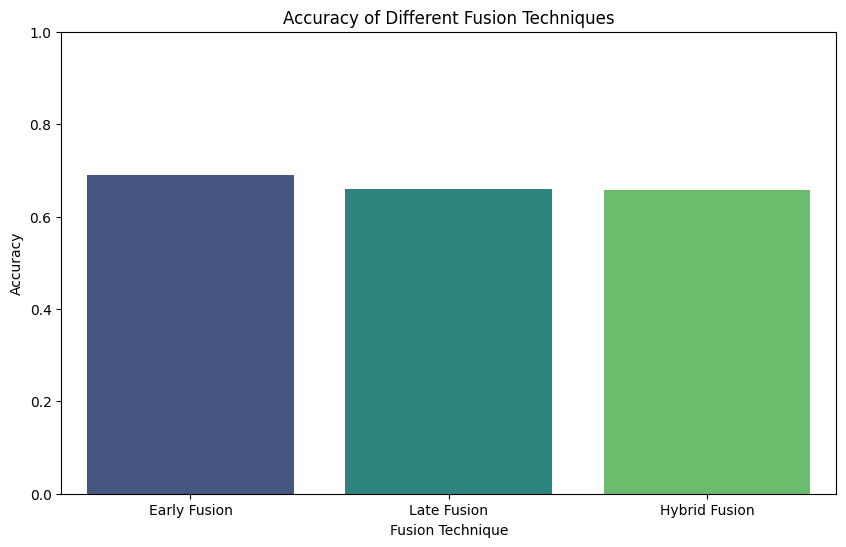

In [71]:
# Accuracies for each fusion technique
accuracies = {
    'Early Fusion': accuracy_score(data_sample_500['label'], early_fusion_preds),
    'Late Fusion': accuracy_score(data_sample_500['label'], late_fusion_preds),
    'Hybrid Fusion': accuracy_score(data_sample_500['label'], hybrid_preds)
}

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.xlabel("Fusion Technique")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Fusion Techniques")
plt.ylim(0, 1)
plt.show()


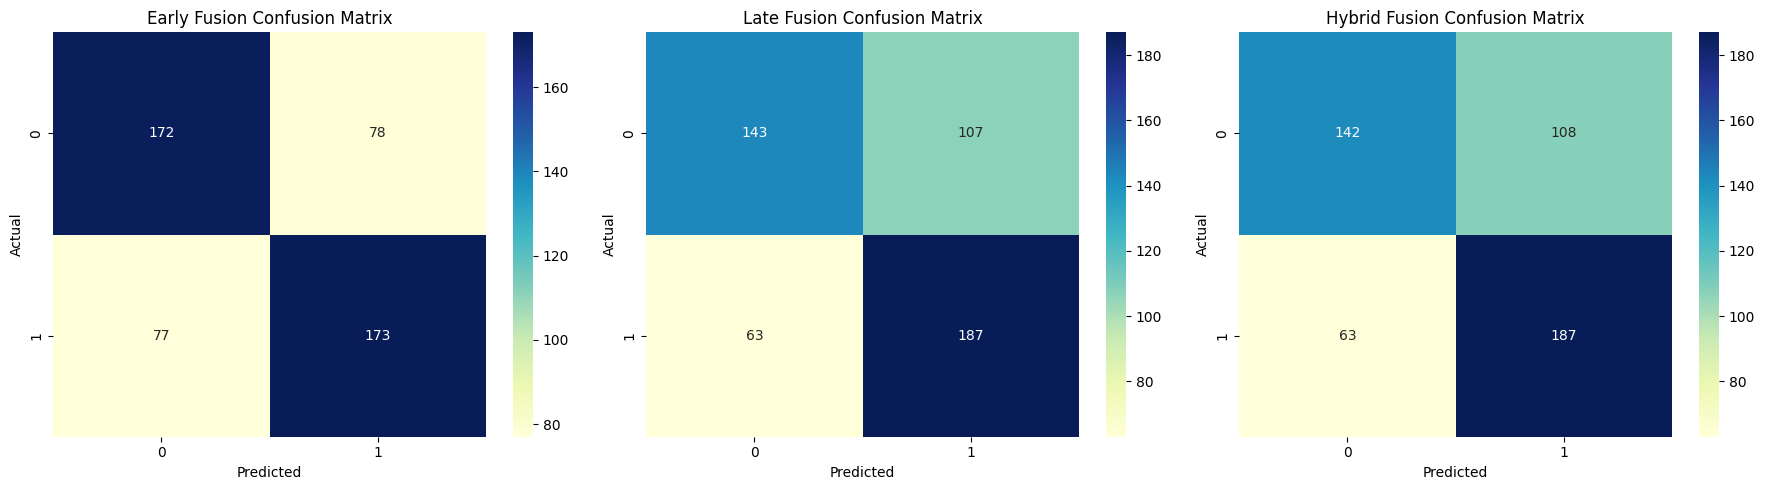

In [72]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fusion_methods = ['Early Fusion', 'Late Fusion', 'Hybrid Fusion']
predictions = [early_fusion_preds, late_fusion_preds, hybrid_preds]

for i, (method, preds) in enumerate(zip(fusion_methods, predictions)):
    cm = confusion_matrix(data_sample_500['label'], preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(f'{method} Confusion Matrix')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


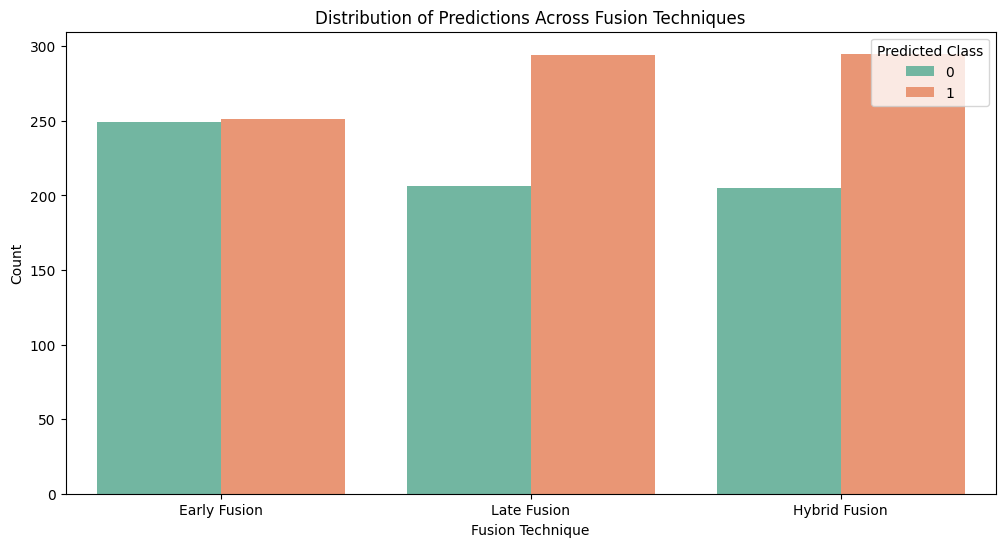

In [73]:
# Gather prediction data for all models
prediction_data = {
    'Fusion Technique': ['Early Fusion'] * len(early_fusion_preds) +
                       ['Late Fusion'] * len(late_fusion_preds) +
                       ['Hybrid Fusion'] * len(hybrid_preds),
    'Prediction': np.concatenate([early_fusion_preds, late_fusion_preds, hybrid_preds])
}

# Create DataFrame for easy plotting
import pandas as pd
pred_df = pd.DataFrame(prediction_data)

# Plot distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Fusion Technique', hue='Prediction', data=pred_df, palette="Set2")
plt.title("Distribution of Predictions Across Fusion Techniques")
plt.xlabel("Fusion Technique")
plt.ylabel("Count")
plt.legend(title="Predicted Class", loc='upper right')
plt.show()


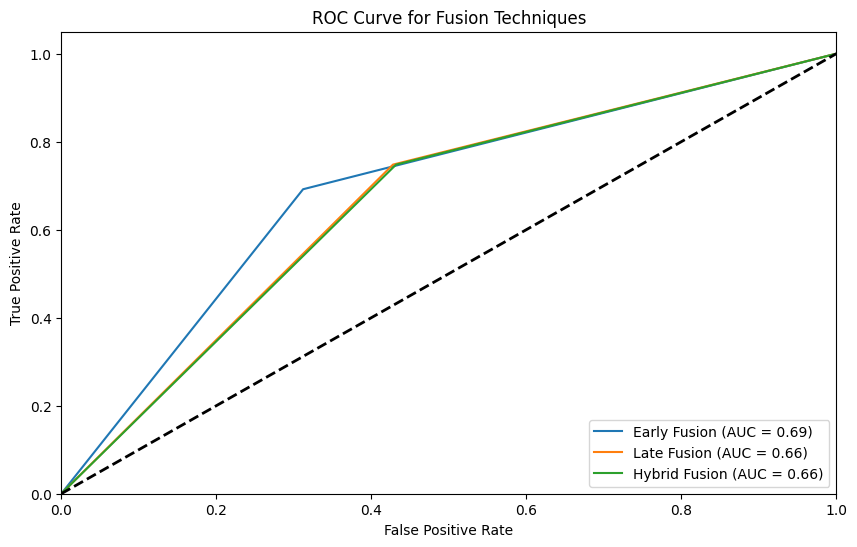

In [74]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curves and AUC for each fusion method
fig, ax = plt.subplots(figsize=(10, 6))
methods = ['Early Fusion', 'Late Fusion', 'Hybrid Fusion']
preds = [early_fusion_preds, late_fusion_preds, hybrid_preds]

for i, (method, preds) in enumerate(zip(methods, preds)):
    fpr, tpr, _ = roc_curve(data_sample_500['label'], preds)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{method} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve for Fusion Techniques")
ax.legend(loc="lower right")
plt.show()
